In [1]:
import json
import csv
import pandas as pd
from pandas import DataFrame, Series
import dateutil.parser
from dateutil.tz import gettz
import datetime
import pytz
from functools import reduce
import time

In [5]:
#mood reporter DF

responsesDF = pd.read_csv("../reporter/responses.tsv", sep='\t', header=0)

timeValues = responsesDF.unix_time.values

def roundUnixTime(timestamp):
    timestamp = timestamp - (timestamp % 3600)
    return timestamp

def convertTime(timestamp):
    timestamp = time.gmtime(timestamp)
    return timestamp


activity_names = list(set(list(map(lambda x: x.lower().strip(), reduce(lambda x,y: x+y, [x.split(",") for x in list(responsesDF.activity.values)])))))

for activity_name in activity_names:
    responsesDF[activity_name.replace(" ", "_") + "_activity"] = responsesDF.activity.apply(lambda x: activity_name in x.lower())

location_names = list(set(list(map(lambda x: x.lower().strip(), reduce(lambda x,y: x+y, [x.split(",") for x in list(responsesDF.location.values)])))))

def split_locations(locations):
    return list(map(lambda x: x.lower().strip(), locations.split(",")))

for location_name in location_names:
    responsesDF[location_name.replace(" ", "_") + "_location"] = responsesDF.location.apply(lambda x: location_name in split_locations(x))


responsesDF.time = responsesDF.unix_time

del responsesDF['moodNotes']
del responsesDF['trigger']
del responsesDF['activity']
del responsesDF['location']
del responsesDF['unix_time']

outputsDF = responsesDF[['time','mood', 'morale', 'stress', 'unique_interactions', 'fatigue', 'compulsions', 'alone']].copy()

def convertUTCToTimestamp(timestamp):
    nanosecondTimestamp = timestamp * 1e9
    timestamp = pd.Timestamp(nanosecondTimestamp, tz='US/Eastern')
    return timestamp

outputsDF.time = outputsDF.time.apply(convertUTCToTimestamp)

outputsDF

,time,mood,morale,stress,unique_interactions,fatigue,compulsions,alone
0,2018-04-09 10:03:18.315716096-04:00,4.0,4.0,3.0,1,1.0,True,True
1,2018-04-09 11:03:48.939009024-04:00,4.0,4.0,3.0,1,1.0,True,True
2,2018-04-09 12:00:17.159026944-04:00,3.0,3.0,2.0,1,1.0,False,True
3,2018-04-09 14:34:53.010916096-04:00,3.0,3.0,2.0,2,4.0,False,True
4,2018-04-09 16:56:31.979720960-04:00,3.0,3.0,2.0,0,3.0,False,True
5,2018-04-09 18:00:51.257328896-04:00,3.0,3.0,2.0,0,4.0,False,True
6,2018-04-09 19:58:39.830408192-04:00,4.0,3.0,2.0,2,4.0,True,False
7,2018-04-10 02:00:04.219219968-04:00,4.0,4.0,2.0,2,2.0,True,False
8,2018-04-10 12:47:00.108283136-04:00,3.0,3.0,3.0,2,3.0,True,False
9,2018-04-10 13:54:55.984233984-04:00,2.0,2.0,3.0,1,4.0,True,False


In [2]:
tone_names = ['Sadness', 'Analytical', 'Joy', 'Fear', 'Tentative', 'Anger', 'Confident']
#keylogger DF


with open('../keylogger/logs/log_new.json', 'r') as f:
    keyloggerData = json.load(f)

# tzinfos = { "EDT" : gettz("America/New_York") }

def extract_keyloggerData(data):
    keyloggerResults = []
    keystrokeWordCountResults = []

    for d in data:
#         result = [0]*(len(tone_names) + 6)
        keyloggerResult = [0] * (len(tone_names)+1)
        keystrokeWordCountResult = [0] * 6
        
        tones = d['document_tone']['tones']
        for i in range(len(tones)):
            score = tones[i]['score']
            tone_name = tones[i]['tone_name']
            tone_index = tone_names.index(tone_name)
            keyloggerResult[tone_index] = score            

        keyloggerResult[-1] = d['unix_time']

        keyloggerResults.append(tuple(keyloggerResult))
        
        try:
            keystrokeWordCountResult[0] = d['word_count']
            keystrokeWordCountResult[1] = d['uniqueword_ratio']
            keystrokeWordCountResult[2] = d['backspace_count']
            keystrokeWordCountResult[3] = d['avg_dwelltime']
            keystrokeWordCountResult[4] = d['avg_flighttime']
            keystrokeWordCountResult[5] = d['unix_time']
            
            keystrokeWordCountResults.append(tuple(keystrokeWordCountResult))
            
        except:
            continue
            
    return keyloggerResults, keystrokeWordCountResults

both = extract_keyloggerData(keyloggerData)

keyloggerDF = DataFrame(both[0],
                        columns=[tone_name+"_score" for tone_name in tone_names] + ['time'])

keystrokeWordCountDF = DataFrame(both[1],
                        columns=['word_count', 'uniqueword_ratio', 'backspace_count', 'avg_dwelltime', 'avg_flighttime', 'time'])

In [6]:
keyloggerDF.time = keyloggerDF.time.apply(convertUTCToTimestamp)
keyloggerDF.sort_values('time', inplace=True)
keyloggerOuputsDF = pd.merge_asof(outputsDF, keyloggerDF, on='time', tolerance=pd.Timedelta('2 hours')).dropna()
keyloggerOuputsDF.reset_index(inplace=True)
del keyloggerOuputsDF['index']
keyloggerOuputsDF

,time,mood,morale,stress,unique_interactions,fatigue,compulsions,alone,Sadness_score,Analytical_score,Joy_score,Fear_score,Tentative_score,Anger_score,Confident_score
0,2018-04-09 10:03:18.315716096-04:00,4.0,4.0,3.0,1,1.0,True,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.759384
1,2018-04-09 11:03:48.939009024-04:00,4.0,4.0,3.0,1,1.0,True,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.759384
2,2018-04-09 12:00:17.159026944-04:00,3.0,3.0,2.0,1,1.0,False,True,0.505517,0.000000,0.539330,0.000000,0.837500,0.000000,0.000000
3,2018-04-09 14:34:53.010916096-04:00,3.0,3.0,2.0,2,4.0,False,True,0.000000,0.642905,0.562606,0.000000,0.676131,0.000000,0.000000
4,2018-04-09 16:56:31.979720960-04:00,3.0,3.0,2.0,0,3.0,False,True,0.000000,0.000000,0.630881,0.000000,0.000000,0.000000,0.000000
5,2018-04-09 18:00:51.257328896-04:00,3.0,3.0,2.0,0,4.0,False,True,0.644667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2018-04-09 19:58:39.830408192-04:00,4.0,3.0,2.0,2,4.0,True,False,0.533948,0.000000,0.000000,0.000000,0.000000,0.511345,0.000000
7,2018-04-12 00:37:41.151981056-04:00,3.0,3.0,2.0,1,3.0,False,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,2018-04-12 13:40:07.405005056-04:00,2.0,2.0,4.0,0,2.0,False,True,0.531304,0.620755,0.000000,0.000000,0.619782,0.000000,0.000000
9,2018-04-12 14:42:51.922734848-04:00,2.0,3.0,4.0,0,2.0,False,True,0.000000,0.000000,0.603717,0.000000,0.000000,0.000000,0.000000


In [89]:
# keystrokeWordCountDF.time = keystrokeWordCountDF.time.apply(convertUTCToTimestamp)
keystrokeWordCountDF.sort_values('time', inplace=True)
keystrokeWordCountOuputsDF = pd.merge_asof(outputsDF, keystrokeWordCountDF, on='time', tolerance=pd.Timedelta('2 hours')).dropna()
keystrokeWordCountOuputsDF.reset_index(inplace=True)
del keystrokeWordCountOuputsDF['index']
keystrokeWordCountOuputsDF

,time,mood,morale,stress,unique_interactions,fatigue,compulsions,alone,word_count,uniqueword_ratio,backspace_count,avg_dwelltime,avg_flighttime
0,2018-05-31 00:54:24.027759104-04:00,3.0,2.0,0.0,0,3.5,True,True,42.0,0.714286,4.0,0.087153,0.171138
1,2018-06-02 16:40:40.727516928-04:00,2.5,2.0,2.0,3,1.5,False,True,45.0,0.911111,55.0,0.100966,0.208556
2,2018-06-02 19:08:28.065821184-04:00,3.0,2.5,1.0,1,1.0,False,True,73.0,0.808219,70.0,0.139891,0.219618
3,2018-06-02 20:19:14.888844032-04:00,3.0,3.0,0.0,0,1.5,False,True,16.0,0.687500,15.0,0.101219,0.311904
4,2018-06-02 22:25:59.244112896-04:00,2.5,2.0,0.0,0,2.0,True,True,22.0,0.909091,49.0,0.089719,0.281055
5,2018-06-02 23:26:34.387373056-04:00,3.0,3.0,0.0,0,2.5,False,True,22.0,0.909091,49.0,0.089719,0.281055
6,2018-06-03 16:05:10.222202112-04:00,3.5,3.5,0.0,0,2.0,True,True,10.0,1.000000,2.0,0.128212,0.281025
7,2018-06-03 17:06:07.752846848-04:00,3.5,4.0,0.5,0,2.0,False,True,21.0,0.857143,63.0,0.077993,0.177798
8,2018-06-03 22:34:50.265445120-04:00,2.5,2.0,0.0,1,4.5,True,True,27.0,0.888889,35.0,0.084470,0.214248
9,2018-06-03 23:36:03.059630080-04:00,2.5,1.5,0.5,0,4.5,False,True,27.0,0.888889,35.0,0.084470,0.214248


In [3]:
#affectiva DF


with open('../getAPIdata/merged_file.json', 'r') as f:
    affectivaData = json.load(f)

for x in range(0, len(affectivaData)):
#         affectivaData[x]['time'] = time.gmtime(affectivaData[x]['time']/ 1e3)
        affectivaData[x]['time'] = affectivaData[x]['time']/ 1e3
        affectivaData[x]['emoji'] = len(affectivaData[x]['emoji'])

#     affectivaData[x]['time'] = utc_to_local(datetime.datetime.fromtimestamp((affectivaData[x]['time']/ 1e3)))


affectivaDF = DataFrame(affectivaData)

del affectivaDF['emotions']
del affectivaDF['max_attention']
del affectivaDF['min_attention']
del affectivaDF['max_engagement']
del affectivaDF['min_engagement']
del affectivaDF['max_valence']
del affectivaDF['min_valence']


In [10]:
# affectivaDF.time = affectivaDF.time.apply(convertUTCToTimestamp)
affectivaDF.sort_values('time', inplace=True)
affectivaOuputsDF = pd.merge_asof(outputsDF, affectivaDF, on='time', tolerance=pd.Timedelta('2 hours')).dropna()
affectivaOuputsDF.reset_index(inplace=True)
del affectivaOuputsDF['index']
affectivaOuputsDF

,time,mood,morale,stress,unique_interactions,fatigue,compulsions,alone,avg_attention,avg_engagement,avg_valence,blinks,emoji
0,2018-04-12 00:37:41.151981056-04:00,3.0,3.0,2.0,1,3.0,False,False,98.152039,0.444537,-0.088061,4.0,1.0
1,2018-04-12 09:18:01.240432128-04:00,4.0,3.0,2.0,1,2.0,True,False,98.380449,0.272856,0.000000,14.0,1.0
2,2018-04-12 11:34:36.320323072-04:00,3.0,3.0,4.0,1,2.0,True,True,97.975605,14.039033,-1.251704,18.0,3.0
3,2018-04-12 12:39:29.819958016-04:00,2.0,3.0,4.0,0,2.0,False,True,97.969019,10.275216,-4.754419,9.0,6.0
4,2018-04-12 13:40:07.405005056-04:00,2.0,2.0,4.0,0,2.0,False,True,98.472673,3.381845,-0.116052,17.0,1.0
5,2018-04-12 14:42:51.922734848-04:00,2.0,3.0,4.0,0,2.0,False,True,98.246387,0.097777,0.000000,8.0,1.0
6,2018-04-12 16:47:51.900183808-04:00,2.0,2.0,4.0,0,3.0,False,True,95.508355,18.105206,-10.516976,3.0,2.0
7,2018-04-12 17:57:38.743968-04:00,3.0,3.0,2.0,1,3.0,False,False,98.348564,0.286246,0.000000,3.0,1.0
8,2018-04-12 21:00:10.756322048-04:00,3.0,3.0,2.0,1,4.0,False,False,98.101792,6.870933,-2.966834,0.0,2.0
9,2018-04-13 15:27:43.578693888-04:00,4.0,4.0,2.0,0,3.0,False,True,98.470472,0.091495,0.000000,6.0,1.0


In [11]:
#productivity DF
from dateutil import parser
import calendar

with open('../getAPIdata/productivity.json', 'r') as f:
    productivityFile = json.load(f)

productivityData = productivityFile['rows']

final_productivityData = [];
UTC = pytz.timezone('UTC')

for x in range(0, len(productivityData)):
#     if(productivityData[x][0] > '2018-04-01T00:00:00'):
    date = parser.parse(productivityData[x][0])
    dateutc = str(date.astimezone(UTC))
    dateutc2 = dateutc[:19] + "UTC"
    newtime = time.strptime(dateutc2, "%Y-%m-%d %H:%M:%S%Z")
    finalTime = calendar.timegm(newtime)
    prod_score = productivityData[x][4]
    final_productivityData.append((finalTime, prod_score))

productivityDF = DataFrame(final_productivityData, columns=['time', 'productivity_score'])
productivityDF.time = productivityDF.time.apply(convertUTCToTimestamp)

productivityDF.sort_values('time', inplace=True)
productivityOuputsDF = pd.merge_asof(outputsDF, productivityDF, on='time', tolerance=pd.Timedelta('2 hours')).dropna()
productivityOuputsDF.reset_index(inplace=True)
del productivityOuputsDF['index']

productivityOuputsDF

,time,mood,morale,stress,unique_interactions,fatigue,compulsions,alone,productivity_score
0,2018-04-09 10:03:18.315716096-04:00,4.0,4.0,3.0,1,1.0,True,True,79.95
1,2018-04-09 11:03:48.939009024-04:00,4.0,4.0,3.0,1,1.0,True,True,76.24
2,2018-04-09 12:00:17.159026944-04:00,3.0,3.0,2.0,1,1.0,False,True,55.81
3,2018-04-09 14:34:53.010916096-04:00,3.0,3.0,2.0,2,4.0,False,True,19.67
4,2018-04-09 16:56:31.979720960-04:00,3.0,3.0,2.0,0,3.0,False,True,63.01
5,2018-04-09 18:00:51.257328896-04:00,3.0,3.0,2.0,0,4.0,False,True,49.18
6,2018-04-09 19:58:39.830408192-04:00,4.0,3.0,2.0,2,4.0,True,False,82.83
7,2018-04-10 12:47:00.108283136-04:00,3.0,3.0,3.0,2,3.0,True,False,68.42
8,2018-04-10 13:54:55.984233984-04:00,2.0,2.0,3.0,1,4.0,True,False,76.75
9,2018-04-10 15:41:39.202589952-04:00,3.0,2.0,3.0,2,4.0,False,True,32.08


In [12]:
# google fit

def convertTimeToStruct(timestamp):
    timestamp = time.gmtime(timestamp)
    return timestamp


with open('../google_fit/dataset.json', 'r') as f:
    fitData = json.load(f)
    

stepCountCompressed = []

def extract_fitData(fitData):
    current_timestamp = int(fitData[0]['endTimeNanos']) / 1e9
    current_hour = convertTimeToStruct(int(fitData[0]['endTimeNanos']) / 1e9)
    stepCount = 0

    for d in fitData:
        dHour = convertTimeToStruct(int(d['endTimeNanos']) / 1e9)
        if (dHour.tm_year == current_hour.tm_year and dHour.tm_mon == current_hour.tm_mon and dHour.tm_mday == current_hour.tm_mday and dHour.tm_hour == current_hour.tm_hour):
            stepCount += int(d['value'][0]['intVal'])
        else:
            holder = [0] * 2
            holder[0] = current_timestamp
#             holder[1] = current_hour
            holder[1] = stepCount
            
            stepCountCompressed.append(tuple(holder))
            stepCount = 0

            current_hour = convertTimeToStruct(int(d['endTimeNanos']) / 1e9)
            current_timestamp = int(d['endTimeNanos']) / 1e9

            stepCount += int(d['value'][0]['intVal'])

extract_fitData(fitData['point'])


stepCountDF = DataFrame(stepCountCompressed, columns = ['time', 'stepCount'])
# exerciseDF.time = exerciseDF.time.apply(convertTimeToUnix)

stepCountDF.time = stepCountDF.time.apply(convertUTCToTimestamp)
stepCountDF.sort_values('time', inplace=True)
stepCountOuputsDF = pd.merge_asof(outputsDF, stepCountDF, on='time', tolerance=pd.Timedelta('1.5 hours')).fillna(0)
stepCountOuputsDF.reset_index(inplace=True)
del stepCountOuputsDF['index']
stepCountOuputsDF

,time,mood,morale,stress,unique_interactions,fatigue,compulsions,alone,stepCount
0,2018-04-09 10:03:18.315716096-04:00,4.0,4.0,3.0,1,1.0,True,True,0.0
1,2018-04-09 11:03:48.939009024-04:00,4.0,4.0,3.0,1,1.0,True,True,0.0
2,2018-04-09 12:00:17.159026944-04:00,3.0,3.0,2.0,1,1.0,False,True,0.0
3,2018-04-09 14:34:53.010916096-04:00,3.0,3.0,2.0,2,4.0,False,True,7.0
4,2018-04-09 16:56:31.979720960-04:00,3.0,3.0,2.0,0,3.0,False,True,6.0
5,2018-04-09 18:00:51.257328896-04:00,3.0,3.0,2.0,0,4.0,False,True,0.0
6,2018-04-09 19:58:39.830408192-04:00,4.0,3.0,2.0,2,4.0,True,False,0.0
7,2018-04-10 02:00:04.219219968-04:00,4.0,4.0,2.0,2,2.0,True,False,0.0
8,2018-04-10 12:47:00.108283136-04:00,3.0,3.0,3.0,2,3.0,True,False,103.0
9,2018-04-10 13:54:55.984233984-04:00,2.0,2.0,3.0,1,4.0,True,False,0.0


In [14]:
#tabcounter

with open('../getAPIdata/chromeactivity.json', 'r') as f:
    tabCounterData = json.load(f)

newTabData = []

for key in tabCounterData:
    timestamp = int(key) / 1e3

#     timestamp = time.gmtime(int(key) / 1e3)
#     time = utc_to_local(datetime.datetime.fromtimestamp((int(key)/ 1e3)))
    current_tabCount = tabCounterData[key]['current_tabCount']
    current_windowCount = tabCounterData[key]['current_windowCount']
    tabs_activated = tabCounterData[key]['tabs_activated']
    tabs_created = tabCounterData[key]['tabs_created']
    windows_created = tabCounterData[key]['windows_created']

    newTabData.append([timestamp, current_tabCount, current_windowCount,tabs_activated,tabs_created,windows_created])

tabColumns = ['time', 'current_tabCount', 'current_windowCount','tabs_activated','tabs_created','windows_created']
tabCounterDF = DataFrame(newTabData, columns=tabColumns)
# tabCounterDF.time = tabCounterDF.time.apply(roundTime)

tabCounterDF.time = tabCounterDF.time.apply(convertUTCToTimestamp)

tabCounterDF.sort_values('time', inplace=True)
tabCounterOuputsDF = pd.merge_asof(outputsDF, tabCounterDF, on='time', tolerance=pd.Timedelta('2 hours')).dropna()
tabCounterOuputsDF.reset_index(inplace=True)
del tabCounterOuputsDF['index']

tabCounterOuputsDF

,time,mood,morale,stress,unique_interactions,fatigue,compulsions,alone,current_tabCount,current_windowCount,tabs_activated,tabs_created,windows_created
0,2018-04-29 14:49:43.954731008-04:00,3.5,3.0,3.0,2,2.5,False,False,28.0,1.0,29.0,3.0,0.0
1,2018-04-29 15:51:12.368960-04:00,3.5,3.5,3.0,1,2.5,False,False,23.0,1.0,54.0,1.0,0.0
2,2018-04-29 18:53:16.544942848-04:00,4.0,3.0,3.5,2,3.0,True,False,25.0,0.0,0.0,0.0,0.0
3,2018-04-29 20:01:11.232706048-04:00,4.0,3.5,3.0,1,3.0,True,False,22.0,1.0,20.0,0.0,0.0
4,2018-04-29 21:03:09.639100928-04:00,4.0,3.5,3.5,2,3.5,False,False,29.0,2.0,22.0,6.0,3.0
5,2018-04-30 00:26:18.355994112-04:00,4.5,4.0,3.5,1,4.0,False,False,23.0,1.0,18.0,4.0,0.0
6,2018-04-30 12:23:14.169347072-04:00,3.5,3.5,3.0,4,2.5,False,False,26.0,1.0,91.0,6.0,0.0
7,2018-04-30 14:34:31.534960896-04:00,3.0,3.0,3.5,2,2.5,True,True,28.0,1.0,43.0,0.0,0.0
8,2018-04-30 15:35:22.181766144-04:00,3.0,3.0,3.0,0,2.0,False,True,17.0,1.0,6.0,0.0,0.0
9,2018-04-30 16:40:17.544072192-04:00,2.5,3.0,3.5,0,2.0,False,True,21.0,1.0,15.0,2.0,0.0


In [15]:
heartRateDF = pd.read_csv("../webcam-pulse-detector-no_openmdao/heartRate.csv", sep=',', header=0)

# firstHeartRateDF.create_time = firstHeartRateDF.create_time.apply(convertTimeToStruct)
heartRateDF.sort_values('time', inplace=True)
heartRateDF = heartRateDF.reset_index(drop=True)

heartRateDF.time = heartRateDF.time.apply(convertUTCToTimestamp)

heartRateOutputsDF = pd.merge_asof(outputsDF, heartRateDF, on='time', tolerance=pd.Timedelta('2.5 hours')).dropna()
heartRateOutputsDF.reset_index(inplace=True)
del heartRateOutputsDF['index']

heartRateOutputsDF

,time,mood,morale,stress,unique_interactions,fatigue,compulsions,alone,heart_rate
0,2018-05-18 16:58:21.794635008-04:00,3.0,3.0,0.0,0,2.0,False,True,78.000000
1,2018-05-21 16:49:48.449735936-04:00,3.0,3.0,0.0,1,2.0,False,True,71.000000
2,2018-05-21 17:53:47.788486912-04:00,3.0,3.0,0.0,3,2.0,True,True,71.000000
3,2018-05-21 22:48:48.799660800-04:00,3.5,3.0,0.0,1,3.0,False,False,69.000000
4,2018-05-22 14:35:31.013202944-04:00,3.0,3.0,0.0,1,3.0,False,True,58.000000
5,2018-05-22 15:36:22.071392-04:00,3.0,2.5,0.0,1,3.5,False,True,58.000000
6,2018-05-22 16:53:15.598140928-04:00,3.5,3.5,0.5,0,3.0,True,True,67.000000
7,2018-05-22 17:54:15.653515008-04:00,3.5,3.5,0.0,1,3.0,False,True,71.000000
8,2018-05-22 20:10:34.307340032-04:00,4.0,3.0,0.0,4,3.5,False,False,62.000000
9,2018-05-22 23:45:01.513551104-04:00,3.0,2.0,0.0,2,4.0,False,False,67.000000


In [16]:
def hourOnly(timestamp):
    timestamp = timestamp.hour
#     if (timestamp < 6):
#         timestamp = timestamp + 24
    return timestamp


hourColumn = pd.to_datetime(outputsDF.time, unit='s')
hourDF = DataFrame(hourColumn)
hourDF.sort_values('time', inplace=True)
hourDF['hour'] = hourDF.time.apply(hourOnly)

hourOutputsDF = pd.merge_asof(outputsDF, hourDF, on='time', tolerance=pd.Timedelta('1 hours')).dropna()
hourOutputsDF.reset_index(inplace=True)
del hourOutputsDF['index']
hourOutputsDF

,time,mood,morale,stress,unique_interactions,fatigue,compulsions,alone,hour
0,2018-04-09 10:03:18.315716096-04:00,4.0,4.0,3.0,1,1.0,True,True,10
1,2018-04-09 11:03:48.939009024-04:00,4.0,4.0,3.0,1,1.0,True,True,11
2,2018-04-09 12:00:17.159026944-04:00,3.0,3.0,2.0,1,1.0,False,True,12
3,2018-04-09 14:34:53.010916096-04:00,3.0,3.0,2.0,2,4.0,False,True,14
4,2018-04-09 16:56:31.979720960-04:00,3.0,3.0,2.0,0,3.0,False,True,16
5,2018-04-09 18:00:51.257328896-04:00,3.0,3.0,2.0,0,4.0,False,True,18
6,2018-04-09 19:58:39.830408192-04:00,4.0,3.0,2.0,2,4.0,True,False,19
7,2018-04-10 02:00:04.219219968-04:00,4.0,4.0,2.0,2,2.0,True,False,2
8,2018-04-10 12:47:00.108283136-04:00,3.0,3.0,3.0,2,3.0,True,False,12
9,2018-04-10 13:54:55.984233984-04:00,2.0,2.0,3.0,1,4.0,True,False,13


In [17]:
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [92]:
y_productivity_mood = productivityOuputsDF["mood"]
y_productivity_morale = productivityOuputsDF["morale"]
y_productivity_stress = productivityOuputsDF["stress"]
y_productivity_social = productivityOuputsDF["unique_interactions"]
y_productivity_fatigue = productivityOuputsDF["fatigue"]
y_productivity_compulsions = productivityOuputsDF["compulsions"]
y_productivity_alone = productivityOuputsDF["alone"]

productivityFeaturesList = list(productivityDF.columns.drop('time'))
X_productivity = productivityOuputsDF[productivityFeaturesList]

from sklearn.model_selection import train_test_split

# productivity-mood
X_productivity_train, X_productivity_test, y_productivity_mood_train, y_productivity_mood_test = train_test_split(
    X_productivity, y_productivity_mood, test_size=0.20, shuffle=False)

productivity_mood_SVR = SVR(C=0.1, gamma=0.001)
productivity_mood_SVR = productivity_mood_SVR.fit(X_productivity_train, y_productivity_mood_train)

# productivity-morale
X_productivity_train, X_productivity_test, y_productivity_morale_train, y_productivity_morale_test = train_test_split(
    X_productivity, y_productivity_morale, test_size=0.20, shuffle=False)

productivity_morale_LM = linear_model.LinearRegression()
productivity_morale_LM = productivity_morale_LM.fit(X_productivity_train, y_productivity_morale_train)

# productivity-stress
X_productivity_train, X_productivity_test, y_productivity_stress_train, y_productivity_stress_test = train_test_split(
    X_productivity, y_productivity_stress, test_size=0.20, shuffle=False)

productivity_stress_LM = linear_model.LinearRegression()
productivity_stress_LM = productivity_stress_LM.fit(X_productivity_train, y_productivity_stress_train)

# productivity-social
X_productivity_train, X_productivity_test, y_productivity_social_train, y_productivity_social_test = train_test_split(
    X_productivity, y_productivity_social, test_size=0.20, shuffle=False)

productivity_social_LM = linear_model.LinearRegression()
productivity_social_LM = productivity_social_LM.fit(X_productivity_train, y_productivity_social_train)

# productivity-fatigue
X_productivity_train, X_productivity_test, y_productivity_fatigue_train, y_productivity_fatigue_test = train_test_split(
    X_productivity, y_productivity_fatigue, test_size=0.20, shuffle=False)

productivity_fatigue_LM = linear_model.LinearRegression()
productivity_fatigue_LM = productivity_fatigue_LM.fit(X_productivity_train, y_productivity_fatigue_train)

# productivity-compulsions
X_productivity_train, X_productivity_test, y_productivity_compulsions_train, y_productivity_compulsions_test = train_test_split(
    X_productivity, y_productivity_compulsions, test_size=0.20, shuffle=False)

productivity_compulsions_LM = linear_model.LinearRegression()
productivity_compulsions_LM = productivity_compulsions_LM.fit(X_productivity_train, y_productivity_compulsions_train)

# productivity-alone
X_productivity_train, X_productivity_test, y_productivity_alone_train, y_productivity_alone_test = train_test_split(
    X_productivity, y_productivity_alone, test_size=0.20, shuffle=False)

productivity_alone_LM = linear_model.LinearRegression()
productivity_alone_LM = productivity_alone_LM.fit(X_productivity_train, y_productivity_alone_train)

print(productivity_mood_SVR.score(X_productivity_test, y_productivity_mood_test))
print(productivity_morale_LM.score(X_productivity_test, y_productivity_morale_test))
print(productivity_stress_LM.score(X_productivity_test, y_productivity_stress_test))
print(productivity_social_LM.score(X_productivity_test, y_productivity_social_test))
print(productivity_fatigue_LM.score(X_productivity_test, y_productivity_fatigue_test))
print(productivity_compulsions_LM.score(X_productivity_test, y_productivity_compulsions_test))
print(productivity_alone_LM.score(X_productivity_test, y_productivity_alone_test))

-0.013367035909
0.0672293307336
0.0535983730723
-0.010820714499
-0.784175105359
-0.0110670340695
0.0579877835885


In [57]:
y_keylogger_mood = keyloggerOuputsDF["mood"]
y_keylogger_morale = keyloggerOuputsDF["morale"]
y_keylogger_stress = keyloggerOuputsDF["stress"]
y_keylogger_social = keyloggerOuputsDF["unique_interactions"]
y_keylogger_fatigue = keyloggerOuputsDF["fatigue"]
y_keylogger_compulsions = keyloggerOuputsDF["compulsions"]
y_keylogger_alone = keyloggerOuputsDF["alone"]

keyloggerFeaturesList = list(keyloggerDF.columns.drop('time'))
X_keylogger = keyloggerOuputsDF[keyloggerFeaturesList]

# keylogger-mood
X_keylogger_train, X_keylogger_test, y_keylogger_mood_train, y_keylogger_mood_test = train_test_split(
    X_keylogger, y_keylogger_mood, test_size=0.20, shuffle=False)

keylogger_mood_SVR = SVR(C=0.01, gamma=0.0001)
keylogger_mood_SVR = keylogger_mood_SVR.fit(X_keylogger_train, y_keylogger_mood_train)

# keylogger-morale
X_keylogger_train, X_keylogger_test, y_keylogger_morale_train, y_keylogger_morale_test = train_test_split(
    X_keylogger, y_keylogger_morale, test_size=0.20, shuffle=False)

keylogger_morale_SVR = linear_model.LinearRegression()
keylogger_morale_SVR = keylogger_morale_SVR.fit(X_keylogger_train, y_keylogger_morale_train)

# keylogger-stress
X_keylogger_train, X_keylogger_test, y_keylogger_stress_train, y_keylogger_stress_test = train_test_split(
    X_keylogger, y_keylogger_stress, test_size=0.20, shuffle=False)

keylogger_stress_SVR = linear_model.LinearRegression()
keylogger_stress_SVR = keylogger_stress_SVR.fit(X_keylogger_train, y_keylogger_stress_train)

# keylogger-social
X_keylogger_train, X_keylogger_test, y_keylogger_social_train, y_keylogger_social_test = train_test_split(
    X_keylogger, y_keylogger_social, test_size=0.20, shuffle=False)

keylogger_social_SVR = linear_model.LinearRegression()
keylogger_social_SVR = keylogger_social_SVR.fit(X_keylogger_train, y_keylogger_social_train)

# keylogger-fatigue
X_keylogger_train, X_keylogger_test, y_keylogger_fatigue_train, y_keylogger_fatigue_test = train_test_split(
    X_keylogger, y_keylogger_fatigue, test_size=0.20, shuffle=False)

keylogger_fatigue_SVR = SVR(C=0.1, gamma=1.5)
keylogger_fatigue_SVR = keylogger_fatigue_SVR.fit(X_keylogger_train, y_keylogger_fatigue_train)

# keylogger-compulsions
X_keylogger_train, X_keylogger_test, y_keylogger_compulsions_train, y_keylogger_compulsions_test = train_test_split(
    X_keylogger, y_keylogger_compulsions, test_size=0.20, shuffle=False)

keylogger_compulsions_SVR = linear_model.LinearRegression()
keylogger_compulsions_SVR = keylogger_compulsions_SVR.fit(X_keylogger_train, y_keylogger_compulsions_train)

# keylogger-alone
X_keylogger_train, X_keylogger_test, y_keylogger_alone_train, y_keylogger_alone_test = train_test_split(
    X_keylogger, y_keylogger_alone, test_size=0.20, shuffle=False)

keylogger_alone_SVR = linear_model.LinearRegression()
keylogger_alone_SVR = keylogger_alone_SVR.fit(X_keylogger_train, y_keylogger_alone_train)

print(keylogger_mood_SVR.score(X_keylogger_test, y_keylogger_mood_test))
print(keylogger_morale_SVR.score(X_keylogger_test, y_keylogger_morale_test))
print(keylogger_stress_SVR.score(X_keylogger_test, y_keylogger_stress_test))
print(keylogger_social_SVR.score(X_keylogger_test, y_keylogger_social_test))
print(keylogger_fatigue_SVR.score(X_keylogger_test, y_keylogger_fatigue_test))
print(keylogger_compulsions_SVR.score(X_keylogger_test, y_keylogger_compulsions_test))
print(keylogger_alone_SVR.score(X_keylogger_test, y_keylogger_alone_test))

-0.0209051024992
-0.0767365198564
-0.101649116955
-0.0119277329598
-0.527006959002
-0.0375238751748
-0.0648412784115


In [90]:
from sklearn.svm import SVR

y_keystrokeWordCount_mood = keystrokeWordCountOuputsDF["mood"]
y_keystrokeWordCount_morale = keystrokeWordCountOuputsDF["morale"]
y_keystrokeWordCount_stress = keystrokeWordCountOuputsDF["stress"]
y_keystrokeWordCount_social = keystrokeWordCountOuputsDF["unique_interactions"]
y_keystrokeWordCount_fatigue = keystrokeWordCountOuputsDF["fatigue"]
y_keystrokeWordCount_compulsions = keystrokeWordCountOuputsDF["compulsions"]
y_keystrokeWordCount_alone = keystrokeWordCountOuputsDF["alone"]

keystrokeWordCountFeaturesList = list(keystrokeWordCountDF.columns.drop('time'))
X_keystrokeWordCount = keystrokeWordCountOuputsDF[keystrokeWordCountFeaturesList]

# keystrokeWordCount-mood
X_keystrokeWordCount_train, X_keystrokeWordCount_test, y_keystrokeWordCount_mood_train, y_keystrokeWordCount_mood_test = train_test_split(
    X_keystrokeWordCount, y_keystrokeWordCount_mood, test_size=0.20, shuffle=False)

keystrokeWordCount_mood_SVR = SVR(C=0.1, gamma=0.001)
keystrokeWordCount_mood_SVR = keystrokeWordCount_mood_SVR.fit(X_keystrokeWordCount_train, y_keystrokeWordCount_mood_train)

# keystrokeWordCount-morale
X_keystrokeWordCount_train, X_keystrokeWordCount_test, y_keystrokeWordCount_morale_train, y_keystrokeWordCount_morale_test = train_test_split(
    X_keystrokeWordCount, y_keystrokeWordCount_morale, test_size=0.20, shuffle=False)

keystrokeWordCount_morale_SVR = SVR(C=0.1, gamma=0.001)
keystrokeWordCount_morale_SVR = keystrokeWordCount_morale_SVR.fit(X_keystrokeWordCount_train, y_keystrokeWordCount_morale_train)

# keystrokeWordCount-stress
X_keystrokeWordCount_train, X_keystrokeWordCount_test, y_keystrokeWordCount_stress_train, y_keystrokeWordCount_stress_test = train_test_split(
    X_keystrokeWordCount, y_keystrokeWordCount_stress, test_size=0.20, shuffle=False)

keystrokeWordCount_stress_SVR = linear_model.LinearRegression()
keystrokeWordCount_stress_SVR = keystrokeWordCount_stress_SVR.fit(X_keystrokeWordCount_train, y_keystrokeWordCount_stress_train)

# keystrokeWordCount-social
X_keystrokeWordCount_train, X_keystrokeWordCount_test, y_keystrokeWordCount_social_train, y_keystrokeWordCount_social_test = train_test_split(
    X_keystrokeWordCount, y_keystrokeWordCount_social, test_size=0.20, shuffle=False)

keystrokeWordCount_social_SVR = linear_model.LinearRegression()
keystrokeWordCount_social_SVR = keystrokeWordCount_social_SVR.fit(X_keystrokeWordCount_train, y_keystrokeWordCount_social_train)

# keystrokeWordCount-fatigue
X_keystrokeWordCount_train, X_keystrokeWordCount_test, y_keystrokeWordCount_fatigue_train, y_keystrokeWordCount_fatigue_test = train_test_split(
    X_keystrokeWordCount, y_keystrokeWordCount_fatigue, test_size=0.20, shuffle=False)

keystrokeWordCount_fatigue_SVR = SVR(C=0.1, gamma=0.001)
keystrokeWordCount_fatigue_SVR = keystrokeWordCount_fatigue_SVR.fit(X_keystrokeWordCount_train, y_keystrokeWordCount_fatigue_train)

# keystrokeWordCount-compulsions
X_keystrokeWordCount_train, X_keystrokeWordCount_test, y_keystrokeWordCount_compulsions_train, y_keystrokeWordCount_compulsions_test = train_test_split(
    X_keystrokeWordCount, y_keystrokeWordCount_compulsions, test_size=0.20, shuffle=False)

keystrokeWordCount_compulsions_LM = linear_model.LinearRegression()
keystrokeWordCount_compulsions_LM = keystrokeWordCount_compulsions_LM.fit(X_keystrokeWordCount_train, y_keystrokeWordCount_compulsions_train)

# keystrokeWordCount-alone
X_keystrokeWordCount_train, X_keystrokeWordCount_test, y_keystrokeWordCount_alone_train, y_keystrokeWordCount_alone_test = train_test_split(
    X_keystrokeWordCount, y_keystrokeWordCount_alone, test_size=0.20, shuffle=False)

keystrokeWordCount_alone_SVR = linear_model.LinearRegression()
keystrokeWordCount_alone_SVR = keystrokeWordCount_alone_SVR.fit(X_keystrokeWordCount_train, y_keystrokeWordCount_alone_train)

print(keystrokeWordCount_mood_SVR.score(X_keystrokeWordCount_test, y_keystrokeWordCount_mood_test))
print(keystrokeWordCount_morale_SVR.score(X_keystrokeWordCount_test, y_keystrokeWordCount_morale_test))
print(keystrokeWordCount_stress_SVR.score(X_keystrokeWordCount_test, y_keystrokeWordCount_stress_test))
print(keystrokeWordCount_social_SVR.score(X_keystrokeWordCount_test, y_keystrokeWordCount_social_test))
print(keystrokeWordCount_fatigue_SVR.score(X_keystrokeWordCount_test, y_keystrokeWordCount_fatigue_test))
print(keystrokeWordCount_compulsions_SVR.score(X_keystrokeWordCount_test, y_keystrokeWordCount_compulsions_test))
print(keystrokeWordCount_alone_SVR.score(X_keystrokeWordCount_test, y_keystrokeWordCount_alone_test))

-0.219193952947
-0.040012215787
-0.554135980089
-0.0461394187924
-0.22808770638
0.0137515365096
-0.134240133418


<Container object of 447 artists>

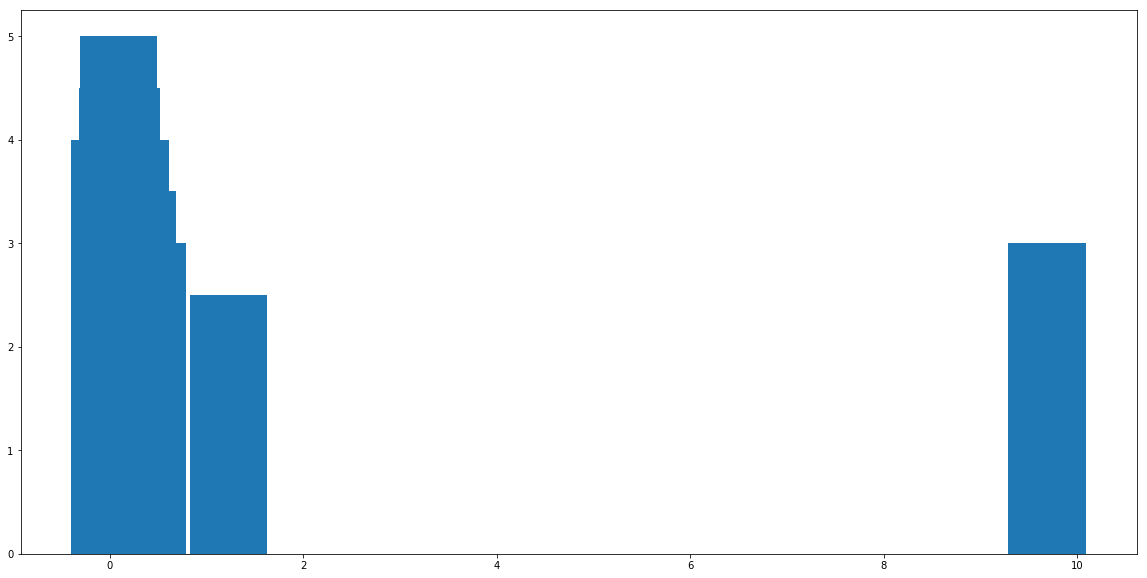

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
# responsesDF.mood.hist(bins=50)
plt.figure(figsize=(20,10))
plt.bar(keystrokeWordCountOuputsDF.avg_dwelltime, keystrokeWordCountOuputsDF.mood)

In [58]:
y_affectiva_mood = affectivaOuputsDF["mood"]
y_affectiva_morale = affectivaOuputsDF["morale"]
y_affectiva_stress = affectivaOuputsDF["stress"]
y_affectiva_social = affectivaOuputsDF["unique_interactions"]
y_affectiva_fatigue = affectivaOuputsDF["fatigue"]
y_affectiva_compulsions = affectivaOuputsDF["compulsions"]
y_affectiva_alone = affectivaOuputsDF["alone"]

affectivaFeaturesList = list(affectivaDF.columns.drop('time'))
X_affectiva = affectivaOuputsDF[affectivaFeaturesList]

# affectiva-mood
X_affectiva_train, X_affectiva_test, y_affectiva_mood_train, y_affectiva_mood_test = train_test_split(
    X_affectiva, y_affectiva_mood, test_size=0.20, shuffle=False)

affectiva_mood_LM = linear_model.LinearRegression()
affectiva_mood_LM = affectiva_mood_LM.fit(X_affectiva_train, y_affectiva_mood_train)

# affectiva-morale
X_affectiva_train, X_affectiva_test, y_affectiva_morale_train, y_affectiva_morale_test = train_test_split(
    X_affectiva, y_affectiva_morale, test_size=0.20, shuffle=False)

affectiva_morale_LM = linear_model.LinearRegression()
affectiva_morale_LM = affectiva_morale_LM.fit(X_affectiva_train, y_affectiva_morale_train)

# affectiva-stress
X_affectiva_train, X_affectiva_test, y_affectiva_stress_train, y_affectiva_stress_test = train_test_split(
    X_affectiva, y_affectiva_stress, test_size=0.20, shuffle=False)

affectiva_stress_SVR = SVR(C=0.1, gamma=0.001)
affectiva_stress_SVR = affectiva_stress_SVR.fit(X_affectiva_train, y_affectiva_stress_train)

# affectiva-social
X_affectiva_train, X_affectiva_test, y_affectiva_social_train, y_affectiva_social_test = train_test_split(
    X_affectiva, y_affectiva_social, test_size=0.20, shuffle=False)

affectiva_social_LM = linear_model.LinearRegression()
affectiva_social_LM = affectiva_social_LM.fit(X_affectiva_train, y_affectiva_social_train)

# affectiva-fatigue
X_affectiva_train, X_affectiva_test, y_affectiva_fatigue_train, y_affectiva_fatigue_test = train_test_split(
    X_affectiva, y_affectiva_fatigue, test_size=0.20, shuffle=False)

affectiva_fatigue_SVR = SVR(C=0.1, gamma=0.001)
affectiva_fatigue_SVR = affectiva_fatigue_SVR.fit(X_affectiva_train, y_affectiva_fatigue_train)

# affectiva-compulsions
X_affectiva_train, X_affectiva_test, y_affectiva_compulsions_train, y_affectiva_compulsions_test = train_test_split(
    X_affectiva, y_affectiva_compulsions, test_size=0.20, shuffle=False)

affectiva_compulsions_LM = linear_model.LinearRegression()
affectiva_compulsions_LM = affectiva_compulsions_LM.fit(X_affectiva_train, y_affectiva_compulsions_train)

# affectiva-alone
X_affectiva_train, X_affectiva_test, y_affectiva_alone_train, y_affectiva_alone_test = train_test_split(
    X_affectiva, y_affectiva_alone, test_size=0.20, shuffle=False)

affectiva_alone_SVR = SVR(C=0.1, gamma=0.001)
affectiva_alone_SVR = affectiva_alone_SVR.fit(X_affectiva_train, y_affectiva_alone_train)

print(affectiva_mood_LM.score(X_affectiva_test, y_affectiva_mood_test))
print(affectiva_morale_LM.score(X_affectiva_test, y_affectiva_morale_test))
print(affectiva_stress_SVR.score(X_affectiva_test, y_affectiva_stress_test))
print(affectiva_social_LM.score(X_affectiva_test, y_affectiva_social_test))
print(affectiva_fatigue_SVR.score(X_affectiva_test, y_affectiva_fatigue_test))
print(affectiva_compulsions_LM.score(X_affectiva_test, y_affectiva_compulsions_test))
print(affectiva_alone_SVR.score(X_affectiva_test, y_affectiva_alone_test))

0.0711232062183
0.0740407470857
-0.168458444046
0.0156890466305
-0.718376408105
-0.0390978745051
-0.239266027207


In [83]:
y_stepCount_mood = stepCountOuputsDF["mood"]
y_stepCount_morale = stepCountOuputsDF["morale"]
y_stepCount_stress = stepCountOuputsDF["stress"]
y_stepCount_social = stepCountOuputsDF["unique_interactions"]
y_stepCount_fatigue = stepCountOuputsDF["fatigue"]
y_stepCount_compulsions = stepCountOuputsDF["compulsions"]
y_stepCount_alone = stepCountOuputsDF["alone"]

stepCountFeaturesList = list(stepCountDF.columns.drop('time'))
X_stepCount = stepCountOuputsDF[stepCountFeaturesList]

# stepCount-mood
X_stepCount_train, X_stepCount_test, y_stepCount_mood_train, y_stepCount_mood_test = train_test_split(
    X_stepCount, y_stepCount_mood, test_size=0.20, shuffle=False)

stepCount_mood_SVR = SVR(C=0.1, gamma=0.018)
stepCount_mood_SVR = stepCount_mood_SVR.fit(X_stepCount_train, y_stepCount_mood_train)

# stepCount-morale
X_stepCount_train, X_stepCount_test, y_stepCount_morale_train, y_stepCount_morale_test = train_test_split(
    X_stepCount, y_stepCount_morale, test_size=0.20, shuffle=False)

stepCount_morale_LM = SVR(C=0.1, gamma=0.01)
stepCount_morale_LM = stepCount_morale_LM.fit(X_stepCount_train, y_stepCount_morale_train)

# stepCount-stress
X_stepCount_train, X_stepCount_test, y_stepCount_stress_train, y_stepCount_stress_test = train_test_split(
    X_stepCount, y_stepCount_stress, test_size=0.20, shuffle=False)

stepCount_stress_LM = SVR(C=0.1, gamma=0.01)
stepCount_stress_LM = stepCount_stress_LM.fit(X_stepCount_train, y_stepCount_stress_train)

# stepCount-social
X_stepCount_train, X_stepCount_test, y_stepCount_social_train, y_stepCount_social_test = train_test_split(
    X_stepCount, y_stepCount_social, test_size=0.20, shuffle=False)

stepCount_social_SVR = SVR(C=0.1, gamma=0.01)
stepCount_social_SVR = stepCount_social_SVR.fit(X_stepCount_train, y_stepCount_social_train)

# stepCount-fatigue
X_stepCount_train, X_stepCount_test, y_stepCount_fatigue_train, y_stepCount_fatigue_test = train_test_split(
    X_stepCount, y_stepCount_fatigue, test_size=0.20, shuffle=False)

stepCount_fatigue_LM = SVR(C=0.1, gamma=0.01)
stepCount_fatigue_LM = stepCount_fatigue_LM.fit(X_stepCount_train, y_stepCount_fatigue_train)

# stepCount-compulsions
X_stepCount_train, X_stepCount_test, y_stepCount_compulsions_train, y_stepCount_compulsions_test = train_test_split(
    X_stepCount, y_stepCount_compulsions, test_size=0.20, shuffle=False)

stepCount_compulsions_LM = SVR(C=0.1, gamma=0.01)
stepCount_compulsions_LM = stepCount_compulsions_LM.fit(X_stepCount_train, y_stepCount_compulsions_train)

# stepCount-alone
X_stepCount_train, X_stepCount_test, y_stepCount_alone_train, y_stepCount_alone_test = train_test_split(
    X_stepCount, y_stepCount_alone, test_size=0.20, shuffle=False)

stepCount_alone_SVR = SVR(C=0.1, gamma=0.001)
stepCount_alone_SVR = stepCount_alone_SVR.fit(X_stepCount_train, y_stepCount_alone_train)

print(stepCount_mood_LM.score(X_stepCount_test, y_stepCount_mood_test))
print(stepCount_morale_LM.score(X_stepCount_test, y_stepCount_morale_test))
print(stepCount_stress_LM.score(X_stepCount_test, y_stepCount_stress_test))
print(stepCount_social_LM.score(X_stepCount_test, y_stepCount_social_test))
print(stepCount_fatigue_LM.score(X_stepCount_test, y_stepCount_fatigue_test))
print(stepCount_compulsions_LM.score(X_stepCount_test, y_stepCount_compulsions_test))
print(stepCount_alone_LM.score(X_stepCount_test, y_stepCount_alone_test))

0.0184636326552
-0.0774249422932
-0.185506436747
0.0568765844624
-0.663333453118
-0.362284793518
0.263142487599


In [65]:
y_tabCounter_mood = tabCounterOuputsDF["mood"]
y_tabCounter_morale = tabCounterOuputsDF["morale"]
y_tabCounter_stress = tabCounterOuputsDF["stress"]
y_tabCounter_social = tabCounterOuputsDF["unique_interactions"]
y_tabCounter_fatigue = tabCounterOuputsDF["fatigue"]
y_tabCounter_compulsions = tabCounterOuputsDF["compulsions"]
y_tabCounter_alone = tabCounterOuputsDF["alone"]

tabCounterFeaturesList = list(tabCounterDF.columns.drop('time'))
X_tabCounter = tabCounterOuputsDF[tabCounterFeaturesList]

# tabCounter-mood
X_tabCounter_train, X_tabCounter_test, y_tabCounter_mood_train, y_tabCounter_mood_test = train_test_split(
    X_tabCounter, y_tabCounter_mood, test_size=0.20, shuffle=False)

tabCounter_mood_LM = SVR(C=0.1, gamma=0.001)
tabCounter_mood_LM = tabCounter_mood_LM.fit(X_tabCounter_train, y_tabCounter_mood_train)

# tabCounter-morale
X_tabCounter_train, X_tabCounter_test, y_tabCounter_morale_train, y_tabCounter_morale_test = train_test_split(
    X_tabCounter, y_tabCounter_morale, test_size=0.20, shuffle=False)

tabCounter_morale_LM = SVR(C=0.1, gamma=0.001)
tabCounter_morale_LM = tabCounter_morale_LM.fit(X_tabCounter_train, y_tabCounter_morale_train)

# tabCounter-stress
X_tabCounter_train, X_tabCounter_test, y_tabCounter_stress_train, y_tabCounter_stress_test = train_test_split(
    X_tabCounter, y_tabCounter_stress, test_size=0.20, shuffle=False)

tabCounter_stress_LM = SVR(C=0.1, gamma=0.001)
tabCounter_stress_LM = tabCounter_stress_LM.fit(X_tabCounter_train, y_tabCounter_stress_train)

# tabCounter-social
X_tabCounter_train, X_tabCounter_test, y_tabCounter_social_train, y_tabCounter_social_test = train_test_split(
    X_tabCounter, y_tabCounter_social, test_size=0.20, shuffle=False)

tabCounter_social_LM = SVR(C=0.1, gamma=0.001)
tabCounter_social_LM = tabCounter_social_LM.fit(X_tabCounter_train, y_tabCounter_social_train)

# tabCounter-fatigue
X_tabCounter_train, X_tabCounter_test, y_tabCounter_fatigue_train, y_tabCounter_fatigue_test = train_test_split(
    X_tabCounter, y_tabCounter_fatigue, test_size=0.20, shuffle=False)

tabCounter_fatigue_LM = linear_model.LinearRegression()
tabCounter_fatigue_LM = tabCounter_fatigue_LM.fit(X_tabCounter_train, y_tabCounter_fatigue_train)

# tabCounter-compulsions
X_tabCounter_train, X_tabCounter_test, y_tabCounter_compulsions_train, y_tabCounter_compulsions_test = train_test_split(
    X_tabCounter, y_tabCounter_compulsions, test_size=0.20, shuffle=False)

tabCounter_compulsions_LM = linear_model.LinearRegression()
tabCounter_compulsions_LM = tabCounter_compulsions_LM.fit(X_tabCounter_train, y_tabCounter_compulsions_train)

# tabCounter-alone
X_tabCounter_train, X_tabCounter_test, y_tabCounter_alone_train, y_tabCounter_alone_test = train_test_split(
    X_tabCounter, y_tabCounter_alone, test_size=0.20, shuffle=False)

tabCounter_alone_LM = linear_model.LinearRegression()
tabCounter_alone_LM = tabCounter_alone_LM.fit(X_tabCounter_train, y_tabCounter_alone_train)

print(tabCounter_mood_LM.score(X_tabCounter_test, y_tabCounter_mood_test))
print(tabCounter_morale_LM.score(X_tabCounter_test, y_tabCounter_morale_test))
print(tabCounter_stress_LM.score(X_tabCounter_test, y_tabCounter_stress_test))
print(tabCounter_social_LM.score(X_tabCounter_test, y_tabCounter_social_test))
print(tabCounter_fatigue_LM.score(X_tabCounter_test, y_tabCounter_fatigue_test))
print(tabCounter_compulsions_LM.score(X_tabCounter_test, y_tabCounter_compulsions_test))
print(tabCounter_alone_LM.score(X_tabCounter_test, y_tabCounter_alone_test))

-0.104645377886
-0.0508528393248
-0.962880747431
-0.142784916573
-0.706851433699
-0.226559349523
-0.310641089301


In [66]:
y_heartRate_mood = heartRateOutputsDF["mood"]
y_heartRate_morale = heartRateOutputsDF["morale"]
y_heartRate_stress = heartRateOutputsDF["stress"]
y_heartRate_social = heartRateOutputsDF["unique_interactions"]
y_heartRate_fatigue = heartRateOutputsDF["fatigue"]
y_heartRate_compulsions = heartRateOutputsDF["compulsions"]
y_heartRate_alone = heartRateOutputsDF["alone"]

heartRateFeaturesList = list(heartRateDF.columns.drop('time'))
X_heartRate = heartRateOutputsDF[heartRateFeaturesList]

# heartRate-mood
X_heartRate_train, X_heartRate_test, y_heartRate_mood_train, y_heartRate_mood_test = train_test_split(
    X_heartRate, y_heartRate_mood, test_size=0.20, shuffle=False)

heartRate_mood_LM = linear_model.LinearRegression()
heartRate_mood_LM = heartRate_mood_LM.fit(X_heartRate_train, y_heartRate_mood_train)

# heartRate-morale
X_heartRate_train, X_heartRate_test, y_heartRate_morale_train, y_heartRate_morale_test = train_test_split(
    X_heartRate, y_heartRate_morale, test_size=0.20, shuffle=False)

heartRate_morale_LM = linear_model.LinearRegression()
heartRate_morale_LM = heartRate_morale_LM.fit(X_heartRate_train, y_heartRate_morale_train)

# heartRate-stress
X_heartRate_train, X_heartRate_test, y_heartRate_stress_train, y_heartRate_stress_test = train_test_split(
    X_heartRate, y_heartRate_stress, test_size=0.20, shuffle=False)

heartRate_stress_LM = linear_model.LinearRegression()
heartRate_stress_LM = heartRate_stress_LM.fit(X_heartRate_train, y_heartRate_stress_train)

# heartRate-social
X_heartRate_train, X_heartRate_test, y_heartRate_social_train, y_heartRate_social_test = train_test_split(
    X_heartRate, y_heartRate_social, test_size=0.20, shuffle=False)

heartRate_social_LM = linear_model.LinearRegression()
heartRate_social_LM = heartRate_social_LM.fit(X_heartRate_train, y_heartRate_social_train)

# heartRate-fatigue
X_heartRate_train, X_heartRate_test, y_heartRate_fatigue_train, y_heartRate_fatigue_test = train_test_split(
    X_heartRate, y_heartRate_fatigue, test_size=0.20, shuffle=False)

heartRate_fatigue_LM = SVR(C=0.1, gamma=0.001)
heartRate_fatigue_LM = heartRate_fatigue_LM.fit(X_heartRate_train, y_heartRate_fatigue_train)

# heartRate-compulsions
X_heartRate_train, X_heartRate_test, y_heartRate_compulsions_train, y_heartRate_compulsions_test = train_test_split(
    X_heartRate, y_heartRate_compulsions, test_size=0.20, shuffle=False)

heartRate_compulsions_LM = linear_model.LinearRegression()
heartRate_compulsions_LM = heartRate_compulsions_LM.fit(X_heartRate_train, y_heartRate_compulsions_train)

# heartRate-alone
X_heartRate_train, X_heartRate_test, y_heartRate_alone_train, y_heartRate_alone_test = train_test_split(
    X_heartRate, y_heartRate_alone, test_size=0.20, shuffle=False)

heartRate_alone_LM = linear_model.LinearRegression()
heartRate_alone_LM = heartRate_alone_LM.fit(X_heartRate_train, y_heartRate_alone_train)

print(heartRate_mood_LM.score(X_heartRate_test, y_heartRate_mood_test))
print(heartRate_morale_LM.score(X_heartRate_test, y_heartRate_morale_test))
print(heartRate_stress_LM.score(X_heartRate_test, y_heartRate_stress_test))
print(heartRate_social_LM.score(X_heartRate_test, y_heartRate_social_test))
print(heartRate_fatigue_LM.score(X_heartRate_test, y_heartRate_fatigue_test))
print(heartRate_compulsions_LM.score(X_heartRate_test, y_heartRate_compulsions_test))
print(heartRate_alone_LM.score(X_heartRate_test, y_heartRate_alone_test))

-0.0794388477401
-0.0426923205509
-1.94402601697
-0.0677503230099
-0.217828854831
-0.116150734463
-0.131318635624


In [68]:
y_hour_mood = hourOutputsDF["mood"]
y_hour_morale = hourOutputsDF["morale"]
y_hour_stress = hourOutputsDF["stress"]
y_hour_social = hourOutputsDF["unique_interactions"]
y_hour_fatigue = hourOutputsDF["fatigue"]
y_hour_compulsions = hourOutputsDF["compulsions"]
y_hour_alone = hourOutputsDF["alone"]

hourFeaturesList = list(hourDF.columns.drop('time'))
X_hour = hourOutputsDF[hourFeaturesList]

# hour-mood
X_hour_train, X_hour_test, y_hour_mood_train, y_hour_mood_test = train_test_split(
    X_hour, y_hour_mood, test_size=0.20, shuffle=False)

hour_mood_LM = SVR(C=0.1, gamma=0.001)
hour_mood_LM = hour_mood_LM.fit(X_hour_train, y_hour_mood_train)

# hour-morale
X_hour_train, X_hour_test, y_hour_morale_train, y_hour_morale_test = train_test_split(
    X_hour, y_hour_morale, test_size=0.20, shuffle=False)

hour_morale_LM = SVR(C=0.1, gamma=0.001)
hour_morale_LM = hour_morale_LM.fit(X_hour_train, y_hour_morale_train)

# hour-stress
X_hour_train, X_hour_test, y_hour_stress_train, y_hour_stress_test = train_test_split(
    X_hour, y_hour_stress, test_size=0.20, shuffle=False)

hour_stress_LM = SVR(C=0.1, gamma=0.001)
hour_stress_LM = hour_stress_LM.fit(X_hour_train, y_hour_stress_train)

# hour-social
X_hour_train, X_hour_test, y_hour_social_train, y_hour_social_test = train_test_split(
    X_hour, y_hour_social, test_size=0.20, shuffle=False)

hour_social_LM = SVR(C=0.1, gamma=0.001)
hour_social_LM = hour_social_LM.fit(X_hour_train, y_hour_social_train)

# hour-fatigue
X_hour_train, X_hour_test, y_hour_fatigue_train, y_hour_fatigue_test = train_test_split(
    X_hour, y_hour_fatigue, test_size=0.20, shuffle=False)

hour_fatigue_LM = SVR(C=0.1, gamma=0.001)
hour_fatigue_LM = hour_fatigue_LM.fit(X_hour_train, y_hour_fatigue_train)

# hour-compulsions
X_hour_train, X_hour_test, y_hour_compulsions_train, y_hour_compulsions_test = train_test_split(
    X_hour, y_hour_compulsions, test_size=0.20, shuffle=False)

hour_compulsions_LM = SVR(C=0.1, gamma=0.001)
hour_compulsions_LM = hour_compulsions_LM.fit(X_hour_train, y_hour_compulsions_train)

# hour-alone
X_hour_train, X_hour_test, y_hour_alone_train, y_hour_alone_test = train_test_split(
    X_hour, y_hour_alone, test_size=0.20, shuffle=False)

hour_alone_LM = SVR(C=0.1, gamma=0.001)
hour_alone_LM = hour_alone_LM.fit(X_hour_train, y_hour_alone_train)

print(hour_mood_LM.score(X_hour_test, y_hour_mood_test))
print(hour_morale_LM.score(X_hour_test, y_hour_morale_test))
print(hour_stress_LM.score(X_hour_test, y_hour_stress_test))
print(hour_social_LM.score(X_hour_test, y_hour_social_test))
print(hour_fatigue_LM.score(X_hour_test, y_hour_fatigue_test))
print(hour_compulsions_LM.score(X_hour_test, y_hour_compulsions_test))
print(hour_alone_LM.score(X_hour_test, y_hour_alone_test))

-0.0377219478361
-0.00620981486832
-0.150833662936
-0.164793420029
-0.232731493943
-0.174440003855
-0.346410826941


<Container object of 902 artists>

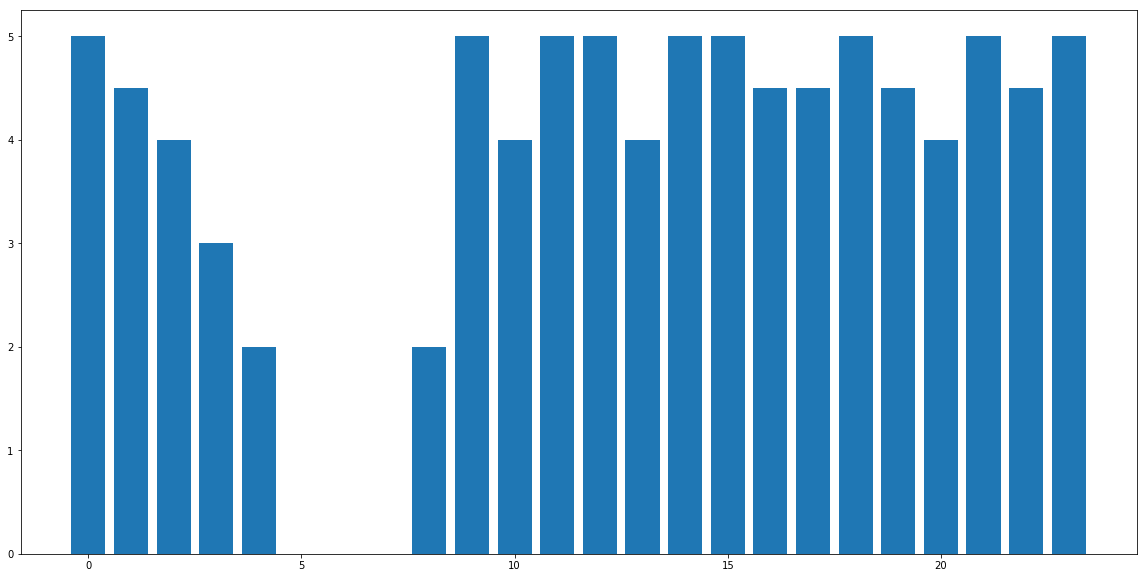

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
# responsesDF.mood.hist(bins=50)
plt.figure(figsize=(20,10))
plt.bar(hourOutputsDF.hour, hourOutputsDF.mood)

In [94]:
allOutputsDF = responsesDF[['time','mood', 'morale', 'stress', 'unique_interactions', 'compulsions', 'alone']].copy()

def convertUTCToTimestamp(timestamp):
    nanosecondTimestamp = timestamp * 1e9
    timestamp = pd.Timestamp(nanosecondTimestamp, tz='US/Eastern')
    return timestamp

allOutputsDF.time = allOutputsDF.time.apply(convertUTCToTimestamp)

y_mood = allOutputsDF["mood"]

allOutputsFeaturesList = list(allOutputsDF.columns.drop('time').drop('mood'))
X_allOutputs = allOutputsDF[allOutputsFeaturesList]

# allOutputs-mood
X_allOutputs_train, X_allOutputs_test, y_mood_train, y_mood_test = train_test_split(
    X_allOutputs, y_mood, test_size=0.20, shuffle=False)

allOutputs_mood_LM = linear_model.LinearRegression()
allOutputs_mood_LM = allOutputs_mood_LM.fit(X_allOutputs_train, y_mood_train)

print(allOutputs_mood_LM.score(X_allOutputs_test, y_mood_test))

0.485453011656


In [109]:
# from sklearn.externals import joblib

# finalMergedDF = joblib.load('/Users/jxu2/github/thesis_explorations/life_support/predictor/finalMergedDF.pkl') 